# Resolução da folha de exercícios n.° 5 da matéria PTC-3569, "Introdução à Inteligência Computacional", ministrada pelo Prof. Dr. Ademar Ferreira
Aluna: Renata Leite Leandro, N.° USP: 11246993

# Exercício 1

##### Resolver o problema da classificação de dígitos manuscritos utilizando o banco de dados MNIST e redes convolucionais. Utilizar a linguagem Python 3 e as bibliotecas Keras e TensorFlow, e o Modelo abaixo:



##### Dígito MNIST

    ↓

##### Conv2D (filtros = 64)

##### MaxPooling2D (2)

##### Conv2D (filtros = 64)

##### MaxPooling2D (2)

##### Conv2D (filtros = 64)

##### Dropout

##### Dense (10)

##### Ativação ( softmax)

    ↓

##### 0 ... 9


##### Utilizar o código cnn-mnist-1.4.1.py, disponível em: https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras

##### Apresentar explicações e comentários pessoais detalhados das linhas relevantes do código, em especial as que se referem a dimensões de tensores e kernels, filtros, otimização (treinamento e teste), função de desempenho (loss function) e regularização. Apresentar os resultados da classificação em termos de percentagem de acertos, para treinamento e teste, para diferentes tipos de otimização e diferentes valores dos hiperparâmetros, como na regularização (valores de Dropout). Experimentar com a função de perdas categorical_crossentropy.

## Resolução:

Primeiramente, importaremos as bibliotecas que serão utilizadas:

In [363]:
# Importa as bibliotecas e o conjunto de dados
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.datasets import mnist

Em seguida, podemos iniciar a explicação do código dado em cnn-mnist-1.4.1.py, que utiliza uma rede convolucional para resolver um problema de classificação (no caso, de diferentes dígitos manuscritos) dado pelo banco de dados MNIST.

Iniciaremos pelo carregamento e tratamento dos dados do dataset:

In [364]:
# Carrega e divide o dataset MNIST:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Computa o número de rótulos (labels) possíveis:
num_labels = len(np.unique(y_train))

# Converte todos os rótulos (tanto treino quanto teste) em um vetor de variáveis dummy (one-hot-encoding):
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Calcula as dimensões da imagem do input:
image_size = x_train.shape[1]

# Redimensiona e normaliza cada imagem que compõe o dataset para que todas possuam tamanhos iguais:
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Com os dados devidamente preparados, prosseguiremos para a criação do modelo. Para uma melhor compreensão do processo, é importante ressaltar algumas funções que estarão presentes nas camadas da network, como:

- Conv2D: camada de convolução para dados 2D (no caso, imagens). A ativação usada será a ReLu (não-linear), muito popular. Ademais, definiremos os parâmetros filter_size (refere-se ao número de filtros na saída) como 64 e kernel_size (que é o filtro que passa pelas imagens) como 3;
- MaxPooling2D: MaxPooling para dados 2D, reportará a máxima saída numa vizinhança retangular;
- Flatten: converte uma array multi-dimensional (no caso, uma imagem) em um vetor, que alimentará a camada "dropout";
- Dropout: técnica de regularização que previne que a rede sofra overfitting. Seleciona alguns neurônios aleatoriamente para serem "deixados de fora" da network durante o treinamento, removendo a temporariamente a contribução desses neurônios e impedindo que a network apenas memorize os dados;
- Dense: camada completamente conectada;
- Softmax: função de ativação útil para problemas distribucionais, que transforma os outputs da rede em um vetor de probabilidades - no caso, um vetor com 10 valores (correspondentes aos números 0-9), em que cada valor corresponde à probabilidade do output corresponder a determinada classe;

Além disso, após a construção da nossa rede de 9 camadas, estabeleceremos também uma função de custo, responsável por avaliar a performance da máquina estimando o quão grande é a diferença entre o output predito e o output verdadeiro. Uma alta função de custo indica que a rede neural não teve bom desempenho, e tal medida é importante porque a network se guiará por ela para melhorar a sua performance, diminuindo o custo pela descida no gradiente. Para ajudar nessa minimização, utilizaremos o otimizador "Adam" (adaptive moment estimation). Um otimizador é responsável por ajustar os pesos e a learning rate, diminuindo, consequentemente, a função de custo; no caso do Adam, isto ocorre através de um "upgrade" do método de gradiente descendente estocástico, pois a learning rate é adaptada individualmente para cada peso. Por último, embora o aprendizado da network seja guiado principalmente pela função de custo, usaremos também a acurácia como métrica para verificar o desempenho da rede.

In [365]:
# Parâmetros da network:
input_shape = (image_size, image_size, 1)    # O 1 significa que a imagem será processada em escala de cinza.
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64    # Dimensão do output da layer, cujo tamanho é definido pela complexidade do problema.
dropout = 0.2


# Modelo CNN-ReLU-MaxPooling:
model = Sequential()    # Cria um modelo do tipo 'sequential', mais comum e simples, em que cada camada recebe exatamente um input e retorna apenas um output (input da camada seguinte).
model.add(Conv2D(filters=filters,     # Adiciona uma camada de convolução com ativação não-linear "relu", mais básica.
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))    # Adiciona uma camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a segunda camada de convolução com ativação "relu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))    # Adiciona a segunda camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a terceira camada de convolução com ativação "ReLu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())    # Adiciona a camada flatten.
model.add(Dropout(dropout))    # Adiciona a camada de dropout, regularizador.
model.add(Dense(num_labels))    # Adiciona uma camada com 10 neurônios (número de labels) que estará completamente conectada com a anterior (dense).
model.add(Activation('softmax'))    # Adiciona uma camada com a função de ativação "softmax"

# Função de custo
model.compile(loss='categorical_crossentropy',    # Define a função de custo, com otimizador básico 'adam' e métrica acurácia.
              optimizer='adam',
              metrics=['accuracy'])

Por fim, treinaremos a network:

In [60]:
# Apresenta a network esquematicamente:
model.summary()


# Treina a network:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 576)             

Vemos que o resultado obtido foi de uma acurácia de aproximadamente 99.7% para o conjunto de treino e de 99.3% para o conjunto de teste. A ligeira diferença entre as acurácias, menor no conjunto de teste, é esperada e serve para indicar que o modelo não sofreu overfitting, já que foi capaz de generalizar, adaptando-se a novos dados. Além disso, juntamente ao aumento da acurácia a cada epoch do treinamento, verificamos a diminuição da função de custo, que chegou a menos de 0.01, o que comprova que houve um processo de aprendizagem pela network.

Embora tenhamos chegado a um ótimo resultado com o código oferecido em cnn-mnist-1.4.1.py, podemos ainda experimentar diferentes valores de hiperparâmetros com o intuito de não apenas tentar melhorar a acurácia obtida, mas também de, principalmente, entender com maior profundidade a função exercida por cada parâmetro. Abaixo, veremos um pouco dessas alterações.

### Dropout

Começaremos, por mudanças na regularização. O valor de dropout inicialmente escolhido, 0.2, fazia com que 20% dos neurônios fosse aleatoriamente excluidos durante o treinamento da rede. A escolha dessa parcela mostra-se adequada por ser, ao mesmo tempo, suficiente para evitar overfitting e pequena para não resultar em uma sub-aprendizagem. Mas e se escolhermos um valor maior?

In [15]:
# Novo parâmetro da network - aumento do dropout:
dropout = 0.8

# Parâmetros da network:
input_shape = (image_size, image_size, 1)    # O 1 significa que a imagem será processada em escala de cinza.
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64    # Dimensão do output da layer, cujo tamanho é definido pela complexidade do problema.


# Modelo CNN-ReLU-MaxPooling:
model = Sequential()    # Cria um modelo do tipo 'sequential', mais comum e simples, em que cada camada recebe exatamente um input e retorna apenas um output (input da camada seguinte).
model.add(Conv2D(filters=filters,     # Adiciona uma camada de convolução com ativação não-linear "relu", mais básica.
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))    # Adiciona uma camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a segunda camada de convolução com ativação "relu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))    # Adiciona a segunda camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a terceira camada de convolução com ativação "ReLu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())    # Adiciona a camada flatten.
model.add(Dropout(dropout))    # Adiciona a camada de dropout, regularizador.
model.add(Dense(num_labels))    # Adiciona uma camada com 10 neurônios (número de labels) que estará completamente conectada com a anterior (dense).
model.add(Activation('softmax'))    # Adiciona uma camada com a função de ativação "softmax"

# Função de custo
model.compile(loss='categorical_crossentropy',    # Define a função de custo, com otimizador básico 'adam' e métrica acurácia.
              optimizer='adam',
              metrics=['accuracy'])


# Treina a network:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 53s 112ms/step - loss: 0.5121 - accuracy: 0.8333
Epoch 2/10
469/469 [==============================] - 52s 110ms/step - loss: 0.1591 - accuracy: 0.9518
Epoch 3/10
469/469 [==============================] - 53s 113ms/step - loss: 0.1196 - accuracy: 0.9643
Epoch 4/10
469/469 [==============================] - 52s 111ms/step - loss: 0.1010 - accuracy: 0.9688
Epoch 5/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0889 - accuracy: 0.9732
Epoch 6/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0768 - accuracy: 0.9771
Epoch 7/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0708 - accuracy: 0.9785
Epoch 8/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0670 - accuracy: 0.9793
Epoch 9/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0626 - accuracy: 0.9805
Epoch 10/10
469/469 [==============================] - 53s 112ms/step - l

Com o aumento da porcentagem de neurônios que serão "dropados" da rede, observamos uma piora no treinamento: a acurácia caiu para 98.3% e o custo subiu para 0.05. Isso mostra que, se o valor de dropout for exacerbado, estaremos, mais do que evitando overfitting, atrapalhando o aprendizado de nossa network.

### Filters

Um outro parâmetro que pode ser modificado são os filters de cada camada de convolução. Seu valor indica qual será a dimensão do output da layer, e, quanto maior a complexidade do problema, maior será o número de filters necessários. Abaixo, veremos o que ocorre quando diminuimos ou aumentamos esse parâmetro:

In [19]:
# Novo parâmetro da network - diminuição dos filters:
filters = 8    # Dimensão do output da layer, cujo tamanho é definido pela complexidade do problema.


# Parâmetros da network:
input_shape = (image_size, image_size, 1)    # O 1 significa que a imagem será processada em escala de cinza.
batch_size = 128
kernel_size = 3
pool_size = 2
dropout = 0.2

# Modelo CNN-ReLU-MaxPooling:
model = Sequential()    # Cria um modelo do tipo 'sequential', mais comum e simples, em que cada camada recebe exatamente um input e retorna apenas um output (input da camada seguinte).
model.add(Conv2D(filters=filters,     # Adiciona uma camada de convolução com ativação não-linear "relu", mais básica.
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))    # Adiciona uma camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a segunda camada de convolução com ativação "relu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))    # Adiciona a segunda camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a terceira camada de convolução com ativação "ReLu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())    # Adiciona a camada flatten.
model.add(Dropout(dropout))    # Adiciona a camada de dropout, regularizador.
model.add(Dense(num_labels))    # Adiciona uma camada com 10 neurônios (número de labels) que estará completamente conectada com a anterior (dense).
model.add(Activation('softmax'))    # Adiciona uma camada com a função de ativação "softmax"

# Função de custo
model.compile(loss='categorical_crossentropy',    # Define a função de custo, com otimizador básico 'adam' e métrica acurácia.
              optimizer='adam',
              metrics=['accuracy'])


# Treina a network:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 10s 21ms/step - loss: 0.8010 - accuracy: 0.7402
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2772 - accuracy: 0.9138
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2147 - accuracy: 0.9336
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1856 - accuracy: 0.9424
Epoch 5/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1657 - accuracy: 0.9478
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1501 - accuracy: 0.9537
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1399 - accuracy: 0.9560
Epoch 8/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1319 - accuracy: 0.9582
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1267 - accuracy: 0.9598
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1214 -

Primeiramente observamos que, ao diminuirmos o tamanho dos filters (64 -> 8), reduzimos em 40 segundos o tempo de processamento de cada epoch. No entanto, por conta da simplificação do processo de aprendizagem da network, a acurácia piora (96%) e o custo aumenta (0.12), visto que a rede, muito provavelmente, assimilou apenas características mais básicas e gerais das imagens.

In [20]:
# Novo parâmetro da network - aumento dos filters:
filters = 192    # Dimensão do output da layer, cujo tamanho é definido pela complexidade do problema.


# Parâmetros da network:
input_shape = (image_size, image_size, 1)    # O 1 significa que a imagem será processada em escala de cinza.
batch_size = 128
kernel_size = 3
pool_size = 2
dropout = 0.2

# Modelo CNN-ReLU-MaxPooling:
model = Sequential()    # Cria um modelo do tipo 'sequential', mais comum e simples, em que cada camada recebe exatamente um input e retorna apenas um output (input da camada seguinte).
model.add(Conv2D(filters=filters,     # Adiciona uma camada de convolução com ativação não-linear "relu", mais básica.
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))    # Adiciona uma camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a segunda camada de convolução com ativação "relu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))    # Adiciona a segunda camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a terceira camada de convolução com ativação "ReLu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())    # Adiciona a camada flatten.
model.add(Dropout(dropout))    # Adiciona a camada de dropout, regularizador.
model.add(Dense(num_labels))    # Adiciona uma camada com 10 neurônios (número de labels) que estará completamente conectada com a anterior (dense).
model.add(Activation('softmax'))    # Adiciona uma camada com a função de ativação "softmax"

# Função de custo
model.compile(loss='categorical_crossentropy',    # Define a função de custo, com otimizador básico 'adam' e métrica acurácia.
              optimizer='adam',
              metrics=['accuracy'])


# Treina a network:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 230s 491ms/step - loss: 0.1676 - accuracy: 0.9475
Epoch 2/10
469/469 [==============================] - 232s 495ms/step - loss: 0.0445 - accuracy: 0.9867
Epoch 3/10
469/469 [==============================] - 246s 525ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 4/10
469/469 [==============================] - 225s 481ms/step - loss: 0.0253 - accuracy: 0.9918
Epoch 5/10
469/469 [==============================] - 235s 500ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 6/10
469/469 [==============================] - 239s 510ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 7/10
469/469 [==============================] - 232s 495ms/step - loss: 0.0140 - accuracy: 0.9955
Epoch 8/10
469/469 [==============================] - 225s 480ms/step - loss: 0.0113 - accuracy: 0.9965
Epoch 9/10
469/469 [==============================] - 228s 487ms/step - loss: 0.0086 - accuracy: 0.9974
Epoch 10/10
469/469 [==============================] - 223s 476m

Já uma maior quantidade de filters (64 -> 192) fez o tempo de processamento das epochs subir consideravelmente, e, embora tenha sido observado um aumento na acurácia do conjunto de treino (99.7%), a acurácia do teste não foi melhorada. Assim, podemos concluir que aumentar a quantidade de filters não é uma boa escolha, visto que o processamento levou um tempo desnecessariamente grande para resultar na mesma acurácia de teste que aquela obtida com 64 filters.

### Função de custo

Em relação aos parâmetros encontrados na função de custo, podemos modificar o otimizador, visto que a métrica definida (acurácia) serve apenas para nos dar uma noção do desempenho da rede e não afeta seu aprendizado. Veja o que ocorre quando trocamos o otimizador Adam pelo SGD:

In [21]:
# Parâmetros da network:
input_shape = (image_size, image_size, 1)    # O 1 significa que a imagem será processada em escala de cinza.
batch_size = 128
kernel_size = 3
pool_size = 2
dropout = 0.2
filters = 64

# Modelo CNN-ReLU-MaxPooling:
model = Sequential()    # Cria um modelo do tipo 'sequential', mais comum e simples, em que cada camada recebe exatamente um input e retorna apenas um output (input da camada seguinte).
model.add(Conv2D(filters=filters,     # Adiciona uma camada de convolução com ativação não-linear "relu", mais básica.
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))    # Adiciona uma camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a segunda camada de convolução com ativação "relu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))    # Adiciona a segunda camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a terceira camada de convolução com ativação "ReLu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())    # Adiciona a camada flatten.
model.add(Dropout(dropout))    # Adiciona a camada de dropout, regularizador.
model.add(Dense(num_labels))    # Adiciona uma camada com 10 neurônios (número de labels) que estará completamente conectada com a anterior (dense).
model.add(Activation('softmax'))    # Adiciona uma camada com a função de ativação "softmax"

# Função de custo
model.compile(loss='categorical_crossentropy',    # Define a função de custo, com otimizador básico 'adam' e métrica acurácia.
              optimizer='sgd',
              metrics=['accuracy'])


# Treina a network:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 53s 112ms/step - loss: 1.5350 - accuracy: 0.5469
Epoch 2/10
469/469 [==============================] - 52s 112ms/step - loss: 0.4367 - accuracy: 0.8663
Epoch 3/10
469/469 [==============================] - 45s 97ms/step - loss: 0.2947 - accuracy: 0.9099
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.2267 - accuracy: 0.9311
Epoch 5/10
469/469 [==============================] - 45s 97ms/step - loss: 0.1901 - accuracy: 0.9427
Epoch 6/10
469/469 [==============================] - 45s 97ms/step - loss: 0.1628 - accuracy: 0.9507
Epoch 7/10
469/469 [==============================] - 45s 96ms/step - loss: 0.1455 - accuracy: 0.9554
Epoch 8/10
469/469 [==============================] - 46s 97ms/step - loss: 0.1324 - accuracy: 0.9593
Epoch 9/10
469/469 [==============================] - 43s 93ms/step - loss: 0.1214 - accuracy: 0.9627
Epoch 10/10
469/469 [==============================] - 50s 107ms/step - loss: 0.

O uso do otimizador SGD apresentou um resultado um pouco abaixo do que havíamos visto anteriormente: a acurácia de teste caiu para 96%. É interessante comparar os resultados obtidos neste caso porque, considerando que ambos os otimizadores vistos até então derivam do mesmo mecanismo de gradiente descendente estocástico, um melhor resultado pelo uso do Adam indica que seu "upgrade" não é em vão, visto que a constante adaptação da learning rate para cada peso resulta em uma melhora real no resultado da classificação.

In [3]:
# Parâmetros da network:
input_shape = (image_size, image_size, 1)    # O 1 significa que a imagem será processada em escala de cinza.
batch_size = 128
kernel_size = 3
pool_size = 2
dropout = 0.2
filters = 64

# Modelo CNN-ReLU-MaxPooling:
model = Sequential()    # Cria um modelo do tipo 'sequential', mais comum e simples, em que cada camada recebe exatamente um input e retorna apenas um output (input da camada seguinte).
model.add(Conv2D(filters=filters,     # Adiciona uma camada de convolução com ativação não-linear "relu", mais básica.
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))    # Adiciona uma camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a segunda camada de convolução com ativação "relu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))    # Adiciona a segunda camada de pooling.
model.add(Conv2D(filters=filters,     # Adiciona a terceira camada de convolução com ativação "ReLu". 
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())    # Adiciona a camada flatten.
model.add(Dropout(dropout))    # Adiciona a camada de dropout, regularizador.
model.add(Dense(num_labels))    # Adiciona uma camada com 10 neurônios (número de labels) que estará completamente conectada com a anterior (dense).
model.add(Activation('softmax'))    # Adiciona uma camada com a função de ativação "softmax"

# Função de custo
model.compile(loss='categorical_crossentropy',    # Define a função de custo, com otimizador básico 'adam' e métrica acurácia.
              optimizer='adagrad',
              metrics=['accuracy'])


# Treina a network:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 49s 104ms/step - loss: 2.2496 - accuracy: 0.3060
Epoch 2/10
469/469 [==============================] - 48s 102ms/step - loss: 1.9214 - accuracy: 0.5429
Epoch 3/10
469/469 [==============================] - 47s 99ms/step - loss: 1.1141 - accuracy: 0.6993
Epoch 4/10
469/469 [==============================] - 48s 101ms/step - loss: 0.7120 - accuracy: 0.7926
Epoch 5/10
469/469 [==============================] - 46s 98ms/step - loss: 0.5729 - accuracy: 0.8278
Epoch 6/10
469/469 [==============================] - 46s 98ms/step - loss: 0.4994 - accuracy: 0.8509
Epoch 7/10
469/469 [==============================] - 46s 98ms/step - loss: 0.4530 - accuracy: 0.8631
Epoch 8/10
469/469 [==============================] - 47s 101ms/step - loss: 0.4151 - accuracy: 0.8742
Epoch 9/10
469/469 [==============================] - 48s 102ms/step - loss: 0.3887 - accuracy: 0.8833
Epoch 10/10
469/469 [==============================] - 46s 98ms/step - loss: 

Já o Adagrad apresenta resultados ainda piores, com acurácia de 89% em treino e 92% em teste. Utilizando diferentes learning rates para cada iteração, o Adagrad performa updates menores (baixa learning rate) para features frequentes e updates maiores  (alta learning rate) para features pouco frequentes, sendo, portanto, útil para datasets com dados esparsos.

# Exercício 2

##### Neste exercício o aluno deverá criar uma rede neural convolucional (CNN) para reconhecer (detectar) objetos em imagens, utilizando o Toolbox Deep Learning e outros do Matlab.

##### Metodologia a ser utilizada: baixar o banco de dados de imagens CIFAR – 10 e criar uma CNN de acordo com o código disponível em: https://www.mathworks.com/help/vision/examples/object-detection-using-deep-learning.html?stid=srchtitle

##### - imageInputLayer – Camada de entrada de imagem

##### - convolution2dLayer – Camada de convolução 2D para RNs convolucionais

##### - reluLayer – Camada de unidade linear retificada (ReLu)

##### - maxPooling2dLayer - Camada de max pooling

##### - fullyConnectedLayer – Camada totalmente conectada

##### - softmaxLayer – Camada softmax

##### - classificationLayer – Camada de saída de classificação

##### Treinar a CNN com o CIFAR – 10 e validar o treinamento da CNN com o CIFAR – 10; obter imagens (fotos) com objetos a serem reconhecidos (veículos, animais domésticos, etc.). Utilizar a técnica de transferência de aprendizado para sintonia fina da rede para detectar os objetos escolhidos.

## Resolução:

Primeiramente, importaremos as bibliotecas que serão utilizadas:

In [370]:
# Importa as bibliotecas e o conjunto de dados:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

from keras.optimizers import SGD
from keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D
from keras.utils import np_utils as utils
from keras.preprocessing.image import img_to_array

from tensorflow.keras.datasets import cifar10 as cifar

Em seguida, carregaremos e trataremos os dados do dataset. Conforme pede o enunciado, utilizaremos o banco de dados CIFAR-10, que consiste em uma coleção de 60000 imagens coloridas de 10 diferentes classes (labels) em dimensões 32x32 pixels. Cada classe apresenta 6000 imagens, e são representadas pelos seguintes rótulos: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

In [371]:
# Carrega e divide o dataset:
(x_train, y_train), (x_test, y_test) = cifar.load_data()

# Redimensiona e normaliza cada imagem que compõe o dataset para que todas possuam tamanhos iguais:
x_train = x_train/255
x_test = x_test/255
     
# Nomeia os rótulos (labels) possíveis, já que o nome das classes não são incluídas na base de dados:
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Computa o número de rótulos (labels) possíveis:
num_labels = len(label)

Agora que os dados estão devidamente tratados, podemos prosseguir para a criação do modelo; mas, antes, relembraremos e explicaremos algumas funções que estarão presentes nas camadas da network, como:

- Conv2D: já visto no exercício anterior, agora terá seus valores como filter_size = 64 e kernel_size = (3, 3);
- MaxPooling2D, Flatten, Dropout, Dense e Softmax: também vistos no exercício anterior, cumprirão a mesma função;
- BatchNormalization: camada que normaliza os inputs, importante para tornar o treino mais estável e rápido.

Assim como no exercício passado, ao final também será estabelecida uma função de custo, responsável por avaliar a performance da máquina estimando o quão grande é a diferença entre o output predito e o output verdadeiro. Utilizaremos o otimizador "Adam" (adaptive moment estimation) e tomaremos a acurácia como métrica para verificar o desempenho da rede.

In [372]:
# Parâmetros da network:
input_shape = (32, 32, 3)    # O 3 significa que a imagem será processada em cores.
kernel_size = (3, 3)    # Tupla indicando altura e largura.
pool_size = (2, 2)
filters = 64    # Dimensão do output da layer, cujo tamanho é definido pela complexidade do problema.
dropout = 0.2

# Modelo CNN-ReLU-MaxPooling:
model = Sequential()    # Cria um modelo do tipo 'sequential', mais comum e simples, em que cada camada recebe exatamente um input e retorna apenas um output (input da camada seguinte).
model.add(Conv2D(filters=filters,     # Adiciona uma camada de convolução com ativação não-linear "relu", mais básica.
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))    # Adiciona uma camada de pooling.
model.add(BatchNormalization())     # Adiciona uma camada de "normalização em lote".
model.add(Flatten(input_shape=input_shape))    # Adiciona a camada flatten.
model.add(Dropout(dropout))    # Adiciona a camada de dropout, regularizador.
model.add(Dense(num_labels))    # Adiciona uma camada com 10 neurônios (número de labels) que estará completamente conectada com a anterior (dense).
model.add(Activation('softmax'))    # Adiciona uma camada com a função de ativação "softmax"

# Função de custo
model.compile(loss='sparse_categorical_crossentropy',    # Define a função de custo, com otimizador básico 'adam' e métrica acurácia.
              optimizer='adam',
              metrics=['accuracy'])

In [373]:
# Treina a network:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.3)
_, acc = model.evaluate(x_test,
                        y_test,
                        verbose=1)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
1094/1094 [==============================] - 49s 45ms/step - loss: 1.4733 - accuracy: 0.4863 - val_loss: 1.6692 - val_accuracy: 0.4777
Epoch 2/10
1094/1094 [==============================] - 46s 42ms/step - loss: 1.1968 - accuracy: 0.5863 - val_loss: 2.1562 - val_accuracy: 0.4198
Epoch 3/10
1094/1094 [==============================] - 40s 37ms/step - loss: 1.1017 - accuracy: 0.6196 - val_loss: 1.2326 - val_accuracy: 0.5789
Epoch 4/10
1094/1094 [==============================] - 40s 36ms/step - loss: 1.0307 - accuracy: 0.6383 - val_loss: 1.5500 - val_accuracy: 0.5351
Epoch 5/10
1094/1094 [==============================] - 40s 37ms/step - loss: 0.9707 - accuracy: 0.6594 - val_loss: 1.3826 - val_accuracy: 0.5437
Epoch 6/10
1094/1094 [==============================] - 42s 38ms/step - loss: 0.9155 - accuracy: 0.6809 - val_loss: 1.2218 - val_accuracy: 0.6003
Epoch 7/10
1094/1094 [==============================] - 40s 36ms/step - loss: 0.8721 - accuracy: 0.6968 - val_loss: 1.4896 -

Após 20 epochs, o nosso modelo se apresenta devidamente testado, atingindo uma acurácia de 73% no conjunto de treino e de 55% no conjunto de teste, além de um custo de apenas 0.76. Embora os valores obtidos sejam piores que aqueles atingidos no exercício 1, devemos considerar que este prolema de predição é consideravelmente mais complexo.

Com a network suficientemente treinada, verificaremos agora se nosso modelo é capaz de detectar objetos com uma boa taxa de acerto. Para isso, aplicaremos o método model.predict em nossos dados de teste, que deverá prever o rótulo das imagens fornecidas por esse conjunto através da criação de diversas arrays com 10 valores de probabilidade cada - isto é, um valor de probabilidade para cada classe existente. Observe:

In [374]:
# Prevê o rótulo de cada imagem do conjunto de teste, criando arrays com 10 valores de probabilidade.
predictions = model.predict(x_test)

# Transforma as arrays de valores de probabilidade em um único número, referente ao rótulo mais provável.
predicted_labels = []
for array in predictions:
    predicted_labels.append(np.argmax(array))    # O argmax retorna o índice de maior valor da array (ou seja, o rótulo com maior probabilidade prevista)

In [375]:
# Usa o método .count() para verificar o número de predições de cada classe.
print('O número de predições realizadas para cada classe foi:',
      '\nairplane:', predicted_labels.count(0), 
      '\nautomobile:', predicted_labels.count(1), 
      '\nbird:', predicted_labels.count(2),
      '\ncat:', predicted_labels.count(3),
      '\ndeer:', predicted_labels.count(4),
      '\ndog:', predicted_labels.count(5),
      '\nfrog:', predicted_labels.count(6), 
      '\nhorse:', predicted_labels.count(7), 
      '\nship:', predicted_labels.count(8), 
      '\ntruck:', predicted_labels.count(9))

O número de predições realizadas para cada classe foi: 
airplane: 1432 
automobile: 1158 
bird: 1942 
cat: 907 
deer: 231 
dog: 1249 
frog: 934 
horse: 649 
ship: 923 
truck: 575


Considerando que cada classe deveria, idealmente, conter 1000 imagens nos dados de teste, o número de predições de nosso modelo pode nos indicar quais classes são as mais problemáticas. É óbvio que não necessariamente as classes "dog" ou "automobile", por exemplo, são as mais corretamente classificadas apenas por apresentarem números próximos a 1000 ocorrências, já que, só com esses dados, não sabemos quantas dessas classificações foram, de fato, exatas; no entanto, podemos ao menos dizer que a classe "horse" é a mais incerta por apresentar um baixo número de predições, o que indica que a network não foi capaz de compreender precisamente suas características, frequentemente confundindo-a com outros rótulos. 

### Detecção de objetos 

Verificaremos agora como o nosso classificador se comporta diante de dados completamente novos, que não pertencem nem ao conjunto de treino e nem ao de teste. Para isso, pegaremos algumas fotos pessoais que se encaixem nos rótulos anteriormente citados e veremos se o nosso modelo é capaz de predizer corretamente a sua classe.

Vamos começar importando a biblioteca OpenCV, essencial para a leitura e processamento de novas imagens:

In [376]:
# Importa a biblioteca necessária:
import cv2

Agora, seguiremos os seguintes passos:
- 1: Leremos a image com a biblioteca opencv, própria para Visão Computacional;
- 2: Dado que esta biblioteca lê a imagem em formato BGR (ou, de modo simplificado, em tons de azul), arrumaremos as cores para o formato RGB
- 3: Exibiremos a imagem com o matplotlib

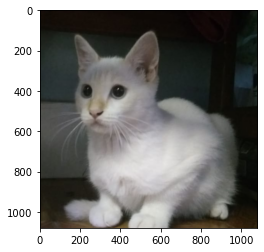

In [377]:
# Lê a imagem:
img = cv2.imread('Screenshot_20221213-111915.png')

# Troca as cores "azuladas" (BGR) pelos tons corretos (RGB):
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

Com a imagem exportada, o nosso próximo passo será tratá-la, adequando-a aos parâmetros seguidos pelo banco de dados CIFAR-10 e pelo modelo que criamos. Para isso, precisaremos redimensionar a imagem, que deverá ser composta por 32x32 pixels.

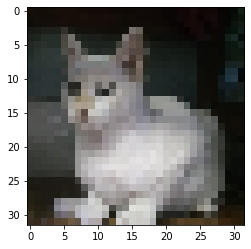

In [378]:
# Redimensiona a imagem para 32x32 pixels:
new_size = 32
resized_image = cv2.resize(img, (new_size, new_size))

plt.imshow(resized_image)

Finalmente, podemos prever um rótulo para a imagem:

In [387]:
# Prevê o rótulo da imagem, criando uma array com 10 valores de probabilidade:
prediction = model.predict(np.expand_dims(resized_image / 255, 0))    # Dividimos por 255 para reescalar (rescale).

# Transforma a array de valores de probabilidade em um único número, referente ao rótulo mais provável:
label = np.argmax(prediction)

print('O rótulo previsto para a imagem fornecida é:', label)

O rótulo previsto para a imagem fornecida é: 3


Considerando que o número 3 corresponde ao rótulo "cat", a previsão de classe foi um sucesso! Vamos testar outras imagens:

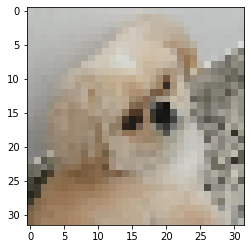

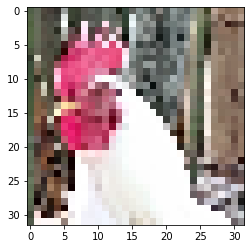

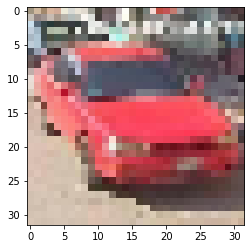

O rótulo previsto para a imagem fornecida é: 5
O rótulo previsto para a imagem fornecida é: 4
O rótulo previsto para a imagem fornecida é: 1


In [403]:
# Lê as imagens:
img2 = cv2.imread('IMG-20221213-WA0013_2.png')
img3 = cv2.imread('IMG_20210919_135416534.png')
img4 = cv2.imread('Screenshot_20221213-112459.png')

# Troca as cores "azuladas" (BGR) pelos tons corretos (RGB):
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Redimensiona a imagem para 32x32 pixels e mostra sua nova versão:
new_size = 32
resized_image2 = cv2.resize(img2, (new_size, new_size))
plt.imshow(resized_image2)
plt.show()
resized_image3 = cv2.resize(img3, (new_size, new_size))
plt.imshow(resized_image3)
plt.show()
resized_image4 = cv2.resize(img4, (new_size, new_size))
plt.imshow(resized_image4)
plt.show()

# Prevê o rótulo da imagem, criando uma array com 10 valores de probabilidade:
prediction2 = model.predict(np.expand_dims(resized_image2 / 255, 0))
prediction3 = model.predict(np.expand_dims(resized_image3 / 255, 0))
prediction4 = model.predict(np.expand_dims(resized_image4 / 255, 0))

# Transforma a array de valores de probabilidade em um único número, referente ao rótulo mais provável:
label2 = np.argmax(prediction2)
label3 = np.argmax(prediction3)
label4 = np.argmax(prediction4)

print('O rótulo previsto para a imagem fornecida é:', label2)
print('O rótulo previsto para a imagem fornecida é:', label3)
print('O rótulo previsto para a imagem fornecida é:', label4)

Das 3 imagens acima, o modelo foi capaz de prever corretamente a primeira ("dog") e a última ("automobile"), falhando apenas na segunda, que não foi reconhecida como um pássaro. Assim, concluímos que, apesar de apresentar certas falhas e dificuldades, o modelo construído foi, sim, capaz de detectar objetos dentro de seu limite.